In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set()


In [5]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

1) Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

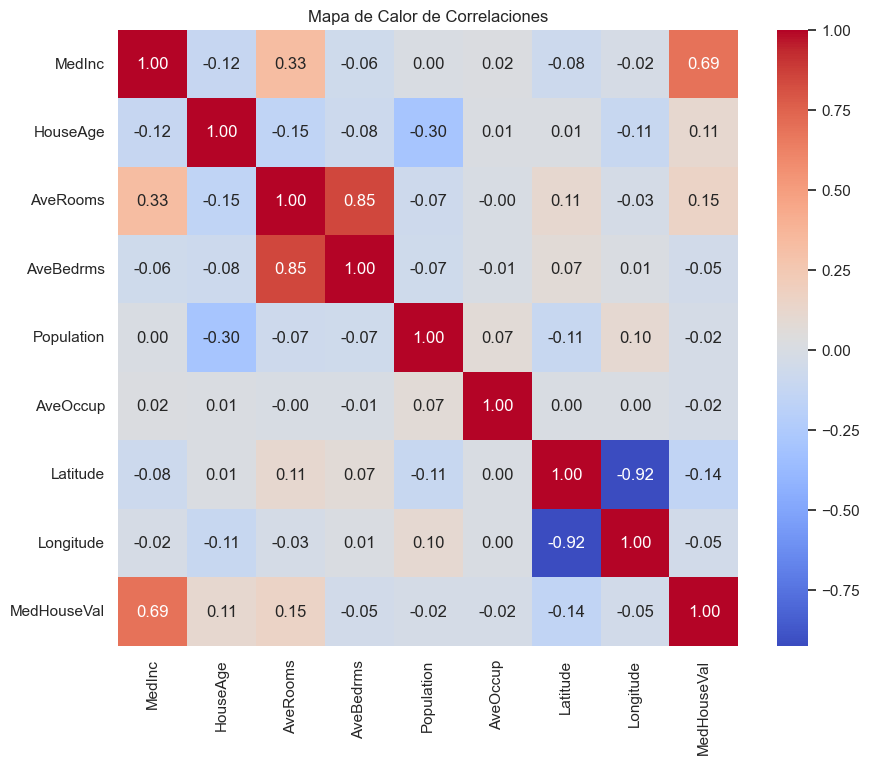

Correlaciones con el target (MedHouseVal):
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [6]:
# Calcular la matriz de correlación
correlation_matrix = df_california.corr(numeric_only=True)  # Aseguramos que sea numérica

# Graficar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

# Identificar la mayor correlación con el target (MedHouseVal)
target_correlations = correlation_matrix["MedHouseVal"].sort_values(ascending=False)

print("Correlaciones con el target (MedHouseVal):")
print(target_correlations)

**¿Cuál atributo tiene mayor correlación lineal con el target (MedHouseVal)?**
El atributo con mayor correlación lineal positiva con el target es "MedInc" (Ingreso medio del bloque) con un coeficiente de correlación de +0.69. 
Esto indica que a medida que aumenta el ingreso medio, también aumenta significativamente el valor medio de las casas.

**¿Cuáles atributos parecen estar más correlacionados entre sí?**
Los atributos que tienen mas correlacion entre ellos son "AveRooms" (Número promedio de habitaciones por hogar) y "AveBedrms" (Número promedio de dormitorios por hogar) con un coeficiente de correlación de +0.85. Esto es lógico
ya que más dormitorios generalmente implican más habitacines promedio en una casa

2) Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

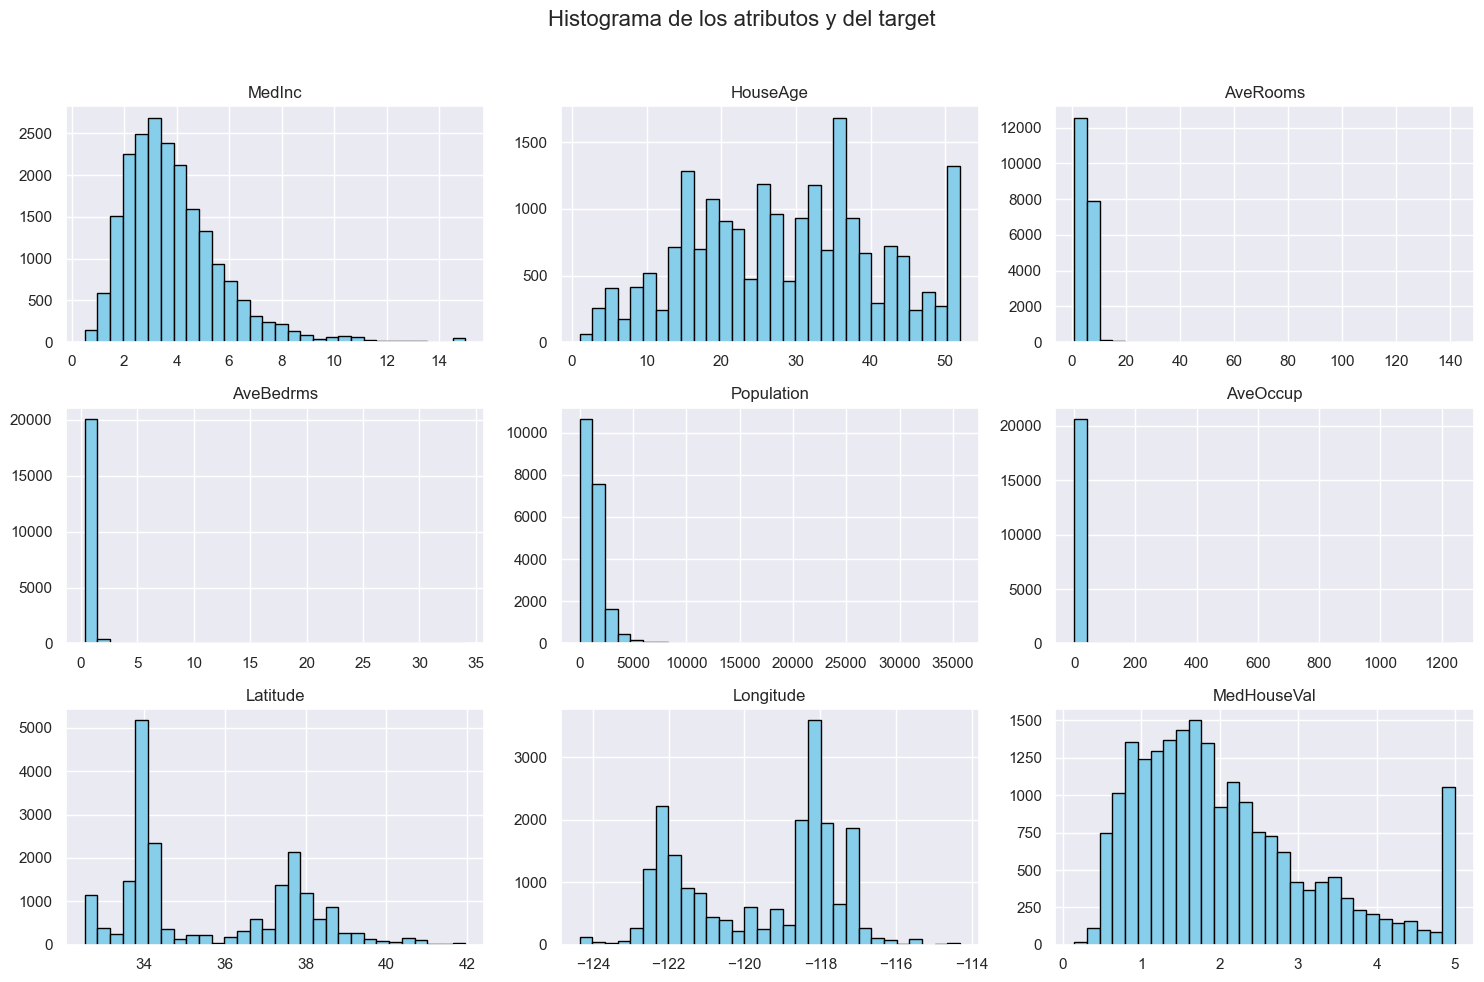

In [7]:
# Se grafica los histogramas de los atributos y el target
df_california.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograma de los atributos y del target", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**¿Qué tipo de forma de histograma se observa?**
* MedInc (Ingreso medio): Tiene una distribución sesgada hacia la derecha, con más valores en los rangos inferiores (mayoría de ingresos bajos).
* HouseAge (Edad de las casas): Muestra una concentración en valores bajos con algunos picos (probablemente debido a construcciones en ciertos periodos históricos).
* AveRooms y AveBedrms (Promedio de habitaciones y dormitorios): Ambas están sesgadas hacia la izquierda, con algunos valores extremos en la cola derecha.
* Population (Población): Tiene una distribución altamente sesgada, con muchos bloques con poblaciones pequeñas y unos pocos con poblaciones muy altas.
* Latitude y Longitude (Latitud y Longitud): Estos atributos tienen distribuciones bimodales, lo que refleja la concentración geográfica de los bloques en California.
* MedHouseVal (target): Tiene una distribución sesgada hacia la derecha, con más bloques con valores medios de casas más bajos.

**¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana?**
* En general, ninguno de los atributos muestra una distribución de campana perfecta, que es característica de una distribución gaussiana. Sin embargo:
    * Algunos atributos, como HouseAge y MedHouseVal, tienen distribuciones ligeramente simétricas, aunque sesgadas.
    * Atributos como Population y AveRooms están claramente sesgados, lo que indica que no se ajustan a una distribución normal.

3) Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [8]:
# Se divide los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Se crea el modelo y se lo entrena con regresión lineal
regression = LinearRegression()
regression.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = regression.predict(X_test)

# Una vez entrenado, podemos ver diferente información del modelo:
print(f"El valor de la intersección de la recta sera {regression.intercept_ }")
print(f"El valor del coeficiente de la recta sera {regression.coef_ }")
print(f"La ecuación de la recta entonces sera la siguiente: y = {regression.intercept_ }+({regression.coef_[0]})X")

print("\n" + "-"*50 + "\n") 
# Calcular la varianza total y la varianza explicada
total_variance = y_test.var()
explained_variance = r2_score(y_test, y_pred) * total_variance

print("Varianza total del target en el set de prueba:", total_variance)
print("Varianza explicada por el modelo en el set de prueba:", explained_variance)
print("Porcentaje de varianza explicada:", (explained_variance / total_variance) * 100, "%")

El valor de la intersección de la recta sera -37.05624133152506
El valor del coeficiente de la recta sera [ 4.45822565e-01  9.68186799e-03 -1.22095112e-01  7.78599557e-01
 -7.75740400e-07 -3.37002667e-03 -4.18536747e-01 -4.33687976e-01]
La ecuación de la recta entonces sera la siguiente: y = -37.05624133152506+(0.44582256530620745)X

--------------------------------------------------

Varianza total del target en el set de prueba: 1.312752115584468
Varianza explicada por el modelo en el set de prueba: 0.7820986332559956
Porcentaje de varianza explicada: 59.57702326061665 %


**¿El modelo está capturando el comportamiento del target?**
Al obtener un Porcentaje de varizanza explicada alta (mayor al 50%), podemos deducir que el modelo captura una buena parte del comportamiento del target. Esto significa que el modelo de regresión lineal logra explicar aproximadamente el 59.58%
de la varianza total del target (MedHouseVal) en el conjunto de prueba.

* Varianza total: Representa la dispersión de los valores reales del target (MedHouseVal) en el conjunto de prueba.
* Varianza explicada: Representa la cantidad de varianza del target que el modelo es capaz de capturar con las predicciones.
* Porcentaje de varianza explicada: Permite entender qué tan bien el modelo captura el comportamiento general del target.

4) Calcular las métricas de MSE, MAE y R2 del set de evaluación.

In [9]:
# Se calcula las métricas en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error Cuadrático Medio): {mse}")
print(f"MAE (Error Absoluto Medio): {mae}")
print(f"R^2 (Coeficiente de Determinación): {r2}")

MSE (Error Cuadrático Medio): 0.5305677824766752
MAE (Error Absoluto Medio): 0.5272474538305945
R^2 (Coeficiente de Determinación): 0.5957702326061665


5) Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de α, buscando entre [0, 12.5]. Graficar el valor de MSE versus α.

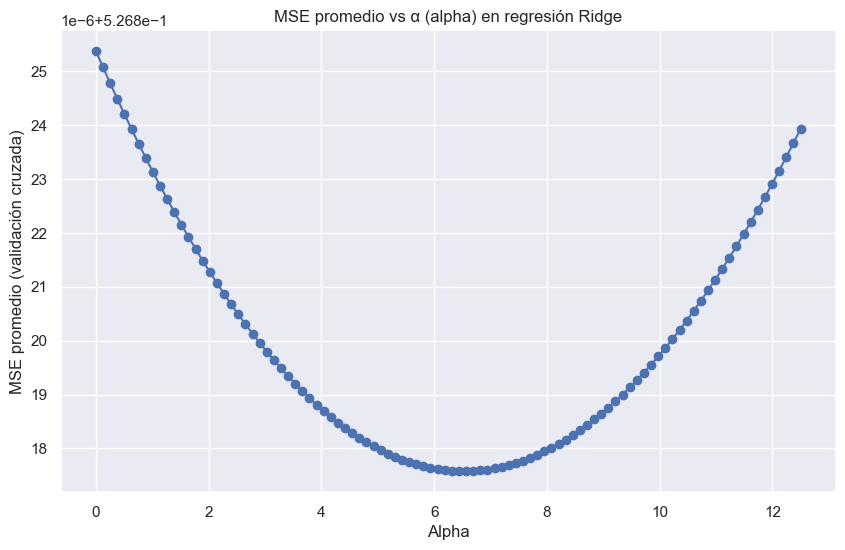

El mejor valor alpha es 6.5657 con un MSE promedio de 0.5268


In [10]:
# Escalemos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=california_housing['feature_names'])

alpha_values = np.linspace(0, 12.5, 100)

# Guardar los MSE medios para cada alpha
mse_values = []

# Evaluar Ridge para cada valor de alpha
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    cv_mse = -1 * cross_val_score(ridge_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5).mean()  # cross_val_score retorna valores negativos del MSE, lo multiplico por -1 para obtener positivos
    mse_values.append(cv_mse)

# Se grafica MSE promedio vs α (alpha)
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_values, marker='o')
plt.xlabel("Alpha")
plt.ylabel("MSE promedio (validación cruzada)")
plt.title("MSE promedio vs α (alpha) en regresión Ridge")
plt.grid(True)
plt.show()

# Encontrar mejor valor alpha
best_alpha = alpha_values[np.argmin(mse_values)]
best_mse = min(mse_values)

print(f"El mejor valor alpha es {best_alpha:.4f} con un MSE promedio de {best_mse:.4f}")

6) Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

In [11]:
### Aclaración: Se vuelven a ejecutar los modelos para tener todo en una celda y estar más organizado para realizar la comparación. ###

# Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predicciones para el set de evaluación (regresión lineal)
y_pred_linear = linear_model.predict(X_test_scaled)

# Entrenar el modelo de Ridge con el mejor alpha
ridge_model_best = Ridge(alpha=best_alpha)
ridge_model_best.fit(X_train_scaled, y_train)

# Predicciones para el set de evaluación (regresión Ridge)
y_pred_ridge = ridge_model_best.predict(X_test_scaled)

# Calcular métricas para ambos modelos
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Crear DataFrame de comparación
comparison_results = {
    "Modelo": ["Regresión Lineal", f"Regresión Ridge (alpha={best_alpha:.4f})"],
    "MSE": [mse_linear, mse_ridge],
    "MAE": [mae_linear, mae_ridge]
}

results_df = pd.DataFrame(comparison_results)

# Mostrar el DataFrame en la salida
print("Resultados de Comparación de Modelos:")
print(results_df)

Resultados de Comparación de Modelos:
                           Modelo       MSE       MAE
0                Regresión Lineal  0.530568  0.527247
1  Regresión Ridge (alpha=6.5657)  0.530415  0.527222


**Comparación de MSE**:
* Regresión Ridge: MSE = 0.530415
* Regresión Lineal: MSE = 0.530568
La regresión Ridge mejora ligeramente el MSE respecto a la regresión lineal (por una diferencia de 0.000153). Esto indica que Ridge ofrece un ajuste ligeramente mejor en el conjunto de prueba.

**Comparación de MAE**:
* Regresión Ridge: MAE = 0.527222
* Regresión Lineal: MAE = 0.527247
La mejora en el MAE es mínima (una diferencia de 0.000025), lo que indica que ambos modelos tienen un rendimiento casi idéntico en términos de error promedio absoluto.

**Conclusión**
Aunque la regresión Ridge ofrece una ligera mejora tanto en MSE como en MAE, la diferencia es tan pequeña que podría no ser estadísticamente significativa.
*   La penalización de Ridge ayuda a reducir el impacto de coeficientes grandes, lo que puede mejorar la generalización del modelo.
*   En este caso, dado que α=6.5657 (moderado), Ridge reduce el sobreajuste de manera leve, lo que explica la mejora marginal.